In [9]:
from data_preparation_pictograms import getDataframePictogram
from datamodule import PictogramDataset, DataModule

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import numpy as np

def imshow(img): 
    img = img / 2 + 0.5 
    npimg = img.numpy() 
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()


In [8]:
import importlib
import datamodule
importlib.reload(datamodule)

<module 'datamodule' from '/teamspace/studios/this_studio/datamodule.py'>

In [10]:
folder_path = "dataset/pictograms"
df = getDataframePictogram(folder_path)

transformaciones = transforms.Compose([
    transforms.Resize((64,64)), #(224, 224)),  # Cambiar tamaño de las imágenes
    transforms.ToTensor(), 
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

In [11]:
dataset = PictogramDataset(df,transformaciones)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

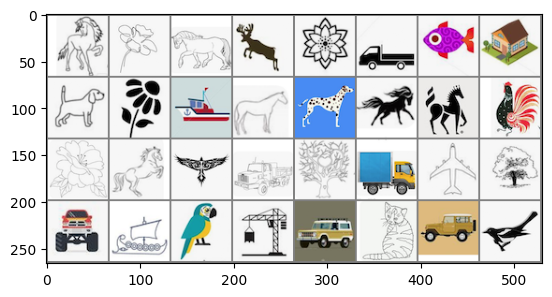

In [13]:
dataiter = iter(dataloader)
images, labels = next(dataiter)

imshow(make_grid(images))

Con datamodule

In [17]:
folder_path = "dataset/pictograms"

datamodule = DataModule(
    name='Pictograms',
    img_size=64,
    img_channels=3,
    data_dir=folder_path,
    batch_size=32,
    num_workers=4,
    train_val_split=0.8,
)

datamodule.prepare_data()
datamodule.setup()
train_dataloader = datamodule.train_dataloader()

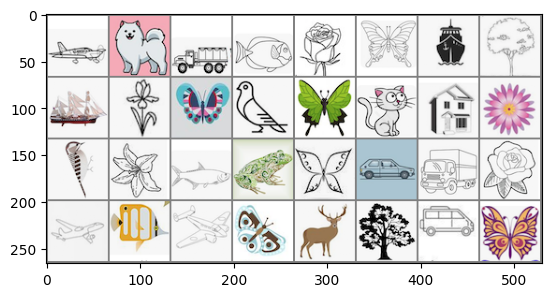

In [18]:
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

imshow(make_grid(images))